In [1]:
import tweepy
from twitter_secrets import CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=False)

In [2]:
user = api.get_user('telecos_rioja')

In [3]:
user

User(_api=<tweepy.api.API object at 0x7fbbdcc0dd50>, _json={'id': 243809723, 'id_str': '243809723', 'name': 'AITER - Ingenieros de Telecomunicación La Rioja', 'screen_name': 'telecos_rioja', 'location': 'La Rioja, Spain', 'profile_location': None, 'description': 'Twitter oficial de la Asociación de Ingenieros de #Telecomunicación de #LaRioja.', 'url': 'https://t.co/5vs5YdyO6q', 'entities': {'url': {'urls': [{'url': 'https://t.co/5vs5YdyO6q', 'expanded_url': 'https://www.aiter.org', 'display_url': 'aiter.org', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 369, 'friends_count': 43, 'listed_count': 17, 'created_at': 'Thu Jan 27 21:27:39 +0000 2011', 'favourites_count': 511, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1918, 'lang': None, 'status': {'created_at': 'Fri Jun 05 11:57:01 +0000 2020', 'id': 1268874462709112834, 'id_str': '1268874462709112834', 'text': 'Principales conclusiones del

In [4]:
followers = api.followers_ids(user.id)

In [5]:
len(followers)

369

In [6]:
followers

[106205259,
 1139204651964882950,
 706822056353075200,
 2148526397,
 1129014955,
 189292089,
 1428028338,
 154095375,
 2587683356,
 1250400933865033728,
 60887027,
 1141602271161212928,
 2464828090,
 558758155,
 851283070233726977,
 1247988763155992576,
 1166050967248355328,
 3854742142,
 1245460608616747010,
 1218949928065687552,
 1238828127423512576,
 372187567,
 1173624533636583424,
 1205920234516942856,
 887644903077019648,
 1064107576349130752,
 276898155,
 747720473304309762,
 1269513930,
 782912225245859840,
 115416310,
 2922126755,
 4172562339,
 1049937491992690688,
 1095426013822095361,
 399554959,
 4863651155,
 834839652766986240,
 1169240692977209345,
 1213524522927710214,
 1157661313801367552,
 1032089070,
 494077888,
 2228102378,
 1149107161,
 981157426069164032,
 47092888,
 163816969,
 1103400885475004416,
 235713095,
 821439972645498883,
 251694598,
 719147860852416512,
 242810619,
 264162413,
 33851918,
 2387344939,
 1026031351697432576,
 4846612870,
 765164993599995904

In [7]:
thinktic_followers = api.followers_ids("thinktic")

In [8]:
len(thinktic_followers)

3001

In [9]:
parent = api.get_user('thinktic')

followers_d = {parent.id: thinktic_followers}

In [10]:
followers_d

{85380154: [1267399193523601408,
  1259439706238050304,
  735106736332410880,
  459207130,
  1076052534127677440,
  607023103,
  118337843,
  1466876120,
  2555879008,
  1250400933865033728,
  1255474505188859906,
  1010905056546295809,
  1255183701505462272,
  908360870543097856,
  481232348,
  893112524459081729,
  1225048323238907906,
  1344677880,
  1143154747119230981,
  12680562,
  1263003456,
  1168146538583007234,
  1165687818741587968,
  3294656099,
  1177528526632886274,
  1562733062,
  1195706624201101313,
  1205920234516942856,
  1440789019,
  178153442,
  251734760,
  108424281,
  1528384320,
  314928462,
  1229807107421212673,
  1213994893258813440,
  269752798,
  214877625,
  311126293,
  1173624533636583424,
  1220796521802801158,
  899888377,
  241972426,
  1129054004913295360,
  1232583026158243842,
  733638408652869632,
  395431589,
  1197120066338377728,
  3200385637,
  2214494780,
  862448916381519873,
  1208592087131799553,
  469527204,
  708675895796613121,
  122

In [ ]:
for follower_id in thinktic_followers:
    if follower_id in followers_d:
        print(f'El follower {follower_id} ya se ha descargado')
        continue
    try:
        followers = api.followers_ids(follower_id)
        followers_d[follower_id] = followers
    except tweepy.TweepError as e:
        if 'Not authorized' in str(e):
            print(f'El usuario {follower_id} no nos deja acceder a sus datos')
        else:
            print(e)
            break

In [ ]:
len(followers_d)

In [ ]:
datos = []
for user_id, followers_ids in followers_d.items():
    for follower_id in followers_ids:
        enlace = {'orig': user_id,
                  'dest': follower_id}
        datos.append(enlace)
        print(user_id, follower_id)
        

In [19]:
import pandas as pd
df = pd.DataFrame(datos)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21555 entries, 0 to 21554
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   orig    21555 non-null  int64
 1   dest    21555 non-null  int64
dtypes: int64(2)
memory usage: 336.9 KB


In [21]:
df.to_csv('grafo.csv', sep=' ', index=False, header=False)

In [11]:
import networkx as nx

In [12]:
G_tw = nx.read_edgelist('grafo.csv',create_using=nx.Graph(),nodetype=int)

In [13]:
print(nx.info(G_tw))

Name: 
Type: Graph
Number of nodes: 21342
Number of edges: 21553
Average degree:   2.0198


In [14]:
nx.density(G_tw)

9.464285727616048e-05

In [15]:
bt = nx.betweenness_centrality(G_tw)

In [16]:
bt

{85380154: 0.5131212863107196,
 735106736332410880: 0.41347292532077645,
 459207130: 0.0020025863604925874,
 1076052534127677440: 0.005661678192641724,
 607023103: 0.40892875960478636,
 118337843: 0.0033334914511331027,
 1466876120: 0.411634084967959,
 2555879008: 0.01183143023204945,
 1250400933865033728: 0.0,
 1255474505188859906: 0.0023610150327224265,
 1010905056546295809: 0.009364206469472253,
 1255183701505462272: 0.0019670222987107034,
 908360870543097856: 0.011356558823407456,
 481232348: 0.24801135119013737,
 893112524459081729: 0.006642945692797462,
 1225048323238907906: 0.0,
 1344677880: 0.0,
 1143154747119230981: 0.0,
 12680562: 0.0,
 1263003456: 0.0,
 1168146538583007234: 0.0,
 1165687818741587968: 0.0,
 3294656099: 0.0,
 1177528526632886274: 0.0,
 1562733062: 0.0,
 1195706624201101313: 0.0,
 1205920234516942856: 0.0002458955732384691,
 1440789019: 0.0012217815698928667,
 178153442: 0.0,
 251734760: 0.0,
 108424281: 0.0,
 1528384320: 0.0,
 314928462: 0.0,
 1229807107421212

In [17]:
import community

In [18]:
parts = community.best_partition(G_tw)

In [19]:
communities=set(parts.values()) #conjunto se usa para convertir una lista de valores en una lista de valores únicos

In [20]:
members = {c:[] for c in communities}
for id, c in parts.items():
    members[c].append(id)

In [21]:
for c, m in members.items():
    print(f'Comunidad {c}: {len(m)} elemtos')

Comunidad 0: 3012 elemtos
Comunidad 1: 4997 elemtos
Comunidad 2: 193 elemtos
Comunidad 3: 4916 elemtos
Comunidad 4: 140 elemtos
Comunidad 5: 4965 elemtos
Comunidad 6: 28 elemtos
Comunidad 7: 132 elemtos
Comunidad 8: 2887 elemtos
Comunidad 9: 72 elemtos


In [22]:
colores = [parts[n] for n in G_tw.nodes()]

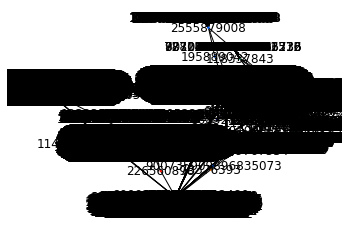

In [24]:
import matplotlib.pyplot as plt
plt.axis('off')
spring_pos = nx.spring_layout(G_tw)
nx.draw_networkx(G_tw,pos=spring_pos,cmap=plt.get_cmap('jet'),node_color=colores,node_size=2,with_label=False)